In [0]:
def compute_cost(X, y, thetas):
  m = X.shape[0]
  y_hat = np.dot(X, thetas)
  sse = np.sum((y_hat - y)**2)
  cost = sse / (2*m)
  return cost

def gradient_descent(X, y, alpha=0.01, num_iters=1500):
  thetas = np.array([0, 0]).reshape(-1, 1)
  m = X.shape[0]
  J_history = np.zeros(num_iters)
    
  for num_iter in range(num_iters):
    h = np.dot(X, thetas)
    loss = h - y
    gradient = np.dot(X.T, loss) / m
    thetas = thetas - alpha * gradient
    cost = compute_cost(X, y, thetas=thetas)
    J_history[num_iter] = cost

  return thetas, J_history

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
test_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/test.csv"
labeled = pd.read_csv(train_url)
test = pd.read_csv(test_url)
print(labeled.shape)
print(test.shape)


(1460, 81)
(1459, 80)


In [4]:
labeled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
import numpy as np

row_indice = np.array(labeled.index)
np.random.shuffle(row_indice)
row_indice

array([347, 385, 414, ..., 992,  50, 601])

In [7]:
labeled_shuffle = labeled.loc[row_indice, :]
labeled_shuffle

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
347,348,20,RL,NaN,17600,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,157500
385,386,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000
414,415,60,RL,59.0,11228,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,228000
1156,1157,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,179900
1133,1134,60,RL,80.0,9828,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,239500
532,533,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
1221,1222,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,134000
920,921,60,RL,70.0,8462,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,201000
1377,1378,50,RL,60.0,10998,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,117000
105,106,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,250000


In [8]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(labeled, test_size=0.3, random_state=123)
print(train.shape)
print(validation.shape)

(1022, 81)
(438, 81)


In [9]:
train.corr()
saleprice_corr = train.corr()["SalePrice"]
saleprice_corr.abs().nlargest(10)

SalePrice       1.000000
OverallQual     0.790702
GrLivArea       0.693104
GarageCars      0.632214
1stFlrSF        0.619766
GarageArea      0.617005
TotalBsmtSF     0.616332
FullBath        0.558687
YearBuilt       0.525848
TotRmsAbvGrd    0.521183
Name: SalePrice, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()
X_train = train["GrLivArea"].values.reshape(-1, 1)
y_train = train.loc[:, "SalePrice"].values.reshape(-1, 1)
reg_1 = LinearRegression()
reg_1.fit(train["GrLivArea"].values.reshape(-1, 1), train["SalePrice"].values.reshape(-1, 1))
reg.fit(X_train, y_train)
y_hat = reg_1.predict(validation["GrLivArea"].values.reshape(-1, 1))
y = validation["SalePrice"].values
print(y_hat[:5])
print(y[:5])
mse = mean_squared_error(y.reshape(-1, 1), y_hat)
print(mse)

[[233745.48563165]
 [206575.78911159]
 [199705.291141  ]
 [240199.58978584]
 [184090.52302602]]
[222500  87000 130000 274300 140000]
2541490406.316298


In [11]:
reg_2 = LinearRegression()
reg_2.fit(train[["GrLivArea", "GarageArea"]].values, train["SalePrice"].values.reshape(-1, 1))
y_hat = reg_2.predict(validation[["GrLivArea", "GarageArea"]].values)
y = validation["SalePrice"].values
print(y_hat[:5])
print(y[:5])
mse = mean_squared_error(y.reshape(-1, 1), y_hat)
print(mse)

[[215639.89157561]
 [244586.83979404]
 [182496.58803348]
 [241731.91790651]
 [157696.35579941]]
[222500  87000 130000 274300 140000]
1930533819.9319353


In [12]:
reg_yr = LinearRegression()
reg_yr.fit(train["YearBuilt"].values.reshape(-1, 1), train["SalePrice"].values.reshape(-1, 1))
y_hat = reg_yr.predict(validation["YearBuilt"].values.reshape(-1, 1))
y = validation["SalePrice"].values
print(y_hat[:5])
print(y[:5])
mse = mean_squared_error(y.reshape(-1, 1), y_hat)
print(mse)

[[222787.03459054]
 [ 82447.52222745]
 [226955.53495776]
 [218618.53422332]
 [144975.02773576]]
[222500  87000 130000 274300 140000]
4223063919.5626574


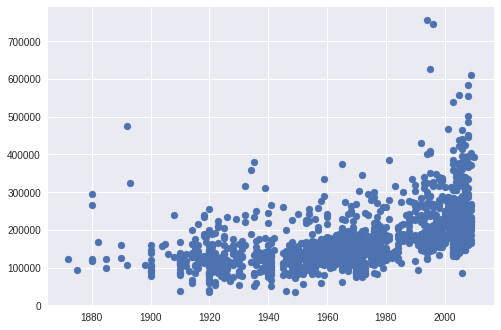

In [13]:
plt.scatter(labeled["YearBuilt"], labeled["SalePrice"])
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
reg_yr_poly = LinearRegression()
reg_yr_poly.fit(poly.fit_transform(train["YearBuilt"].values.reshape(-1, 1)), train["SalePrice"].values.reshape(-1, 1))
y_hat = reg_yr_poly.predict(poly.fit_transform(validation["YearBuilt"].values.reshape(-1, 1)))
y = validation["SalePrice"].values
#print(y_hat[:5])
#print(y[:5])
mse = mean_squared_error(y.reshape(-1, 1), y_hat)
print(mse)

3769969724.3942485


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

labeled = pd.read_csv("https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv")
train, validation = train_test_split(labeled, test_size=0.3, random_state=123)
X_train = train.loc[:, "YearBuilt"].values.reshape(-1, 1)
y_train = train.loc[:, "SalePrice"].values.reshape(-1, 1)
X_arr = np.linspace(labeled["YearBuilt"].min(), labeled["YearBuilt"].max()).reshape(-1, 1)
y_poly_arr = dict()
for d in range(1, 4):
  X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
  reg_poly = LinearRegression()
  reg_poly.fit(X_train_poly, y_train)
  X_arr_poly = PolynomialFeatures(d).fit_transform(X_arr)
  y_arr = reg_poly.predict(X_arr_poly)
  y_poly_arr[d] = y_arr

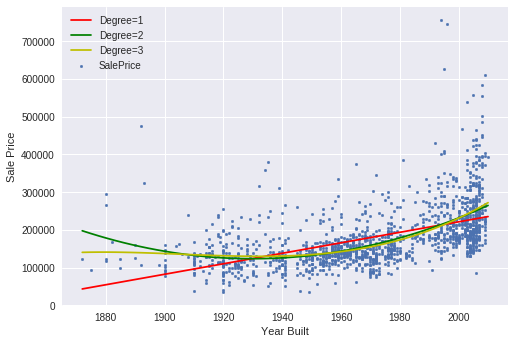

In [16]:
plt.scatter(labeled["YearBuilt"], labeled["SalePrice"], s=7)
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.plot(X_arr, y_poly_arr[1], color = "r", label = "Degree=1")
plt.plot(X_arr, y_poly_arr[2], color = "g", label = "Degree=2")
plt.plot(X_arr, y_poly_arr[3], color = "y", label = "Degree=3")
plt.legend(loc="upper left")
plt.show()

In [0]:
def get_mse_by_degrees(labeled, degrees = range(1, 11)):
  train, validation = train_test_split(labeled, test_size=0.3) #random_state was removed, meaning that the 25:75 datase is floating
  X_train = train.loc[:, "YearBuilt"].values.reshape(-1, 1)
  y_train = train.loc[:, "SalePrice"].values.reshape(-1, 1)
  X_validation = validation.loc[:, "YearBuilt"].values.reshape(-1, 1)
  y_validation = validation.loc[:, "SalePrice"].values.reshape(-1, 1)
  mse_train_arr = np.zeros(len(degrees))
  mse_valid_arr = np.zeros(len(degrees))
  for d in degrees:
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    reg_poly = LinearRegression()
    reg_poly.fit(X_train_poly, y_train)
    X_validation_poly = PolynomialFeatures(d).fit_transform(X_validation)
    y_hat = reg_poly.predict(X_validation_poly)
    mse_valid = mean_squared_error(y_validation, y_hat)
    y_hat = reg_poly.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_hat)
    mse_valid_arr[d-1] = mse_valid
    mse_train_arr[d-1] = mse_train
  best_degree = mse_valid_arr.argmin() + 1
  return mse_valid_arr, mse_train_arr, best_degree

In [0]:
degrees = range(1, 11) 
mse_valid_arr, mse_train_arr, best_degree = get_mse_by_degrees(labeled, degrees) 
#labled data was randomly chosen in each run, so the best degree varies based on different data was given. 
#This problem can be solved by cross-validation

Best Degree: 2


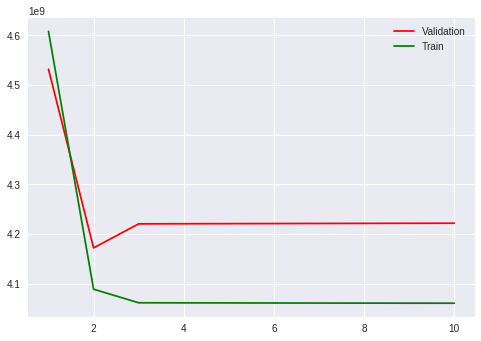

In [19]:
print("Best Degree: {}".format(best_degree))
plt.plot(degrees, mse_valid_arr, color="r", label="Validation")
plt.plot(degrees, mse_train_arr, color="g", label="Train")
plt.legend()
plt.show()

In [21]:
X_train = train.loc[:, ["YearBuilt", "GrLivArea", "GarageArea"]].values
PolynomialFeatures(2).fit_transform(X_train).shape

(1022, 10)

In [0]:
def get_mse_by_degrees(labeled, degrees = range(1, 11)):
  train, validation = train_test_split(labeled, test_size=0.3) 
  X_train = train.loc[:, ["YearBuilt", "GrLivArea", "GarageArea"]].values 
  y_train = train.loc[:, "SalePrice"].values.reshape(-1, 1)
  X_validation = validation.loc[:, ["YearBuilt", "GrLivArea", "GarageArea"]].values
  y_validation = validation.loc[:, "SalePrice"].values.reshape(-1, 1)
  mse_train_arr = np.zeros(len(degrees))
  mse_valid_arr = np.zeros(len(degrees))
  for d in degrees:
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    reg_poly = LinearRegression()
    reg_poly.fit(X_train_poly, y_train)
    X_validation_poly = PolynomialFeatures(d).fit_transform(X_validation)
    y_hat = reg_poly.predict(X_validation_poly)
    mse_valid = mean_squared_error(y_validation, y_hat)
    y_hat = reg_poly.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_hat)
    mse_valid_arr[d-1] = mse_valid
    mse_train_arr[d-1] = mse_train
  best_degree = mse_valid_arr.argmin() + 1
  return mse_valid_arr, mse_train_arr, best_degree
#multiple variables in one regression, meaning that the situation of multicollinearity occurs 

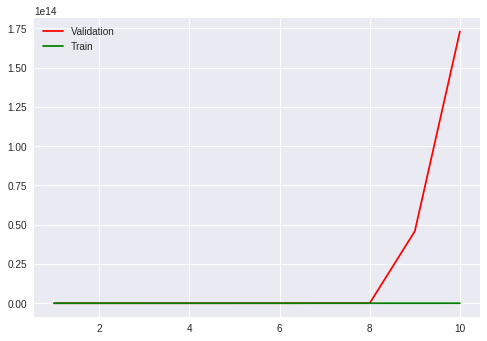

In [25]:
degrees = range(1, 11)
mse_valid_arr, mse_train_arr, best_degree = get_mse_by_degrees(labeled, degrees)
plt.plot(degrees, mse_valid_arr, color="r", label="Validation")
plt.plot(degrees, mse_train_arr, color="g", label="Train")
plt.legend()
plt.show()

In [35]:
from sklearn.linear_model import Ridge #Ridge regression is one of the ways to solve multicollinearity
from sklearn.model_selection import GridSearchCV #GridSearchCV enables cross valudation

X_train = labeled.loc[:, ["YearBuilt", "GrLivArea", "GarageArea"]].values
y_train = labeled.loc[:, "SalePrice"].values.reshape(-1, 1)
reg = Ridge()
parameters = {"alpha": [1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]}
gridclassifier=GridSearchCV(reg, param_grid=parameters, cv=4, scoring="neg_mean_squared_error") #cross validation = 4 or k-fold
gridclassifier.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 10, 100, 1000, 10000, 100000, 1000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [36]:
#gridclassifier.best_estimator_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
#gridclassifier.best_params_

{'alpha': 1}

In [31]:
gridclassifier.best_score_

-2025163284.7384624